# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df = pd.read_csv('/content/drive/MyDrive/emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [47]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


## Looking at the data

<Figure size 1500x1000 with 0 Axes>

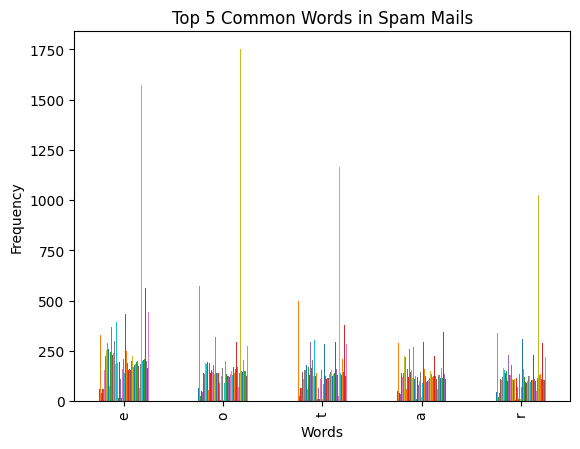

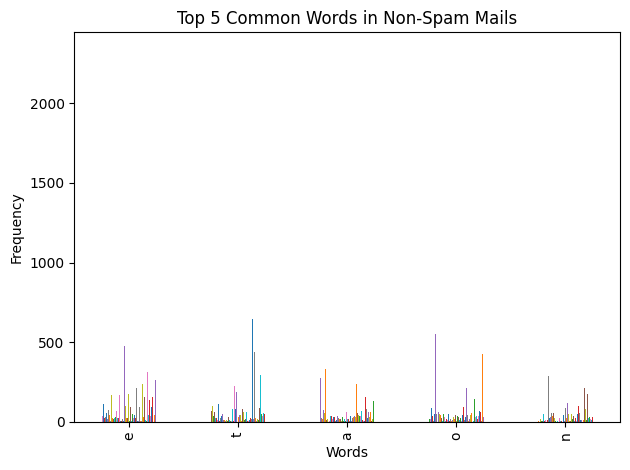

In [48]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
spam_data = df[df['spam'] == 1]
non_spam_data = df[df['spam'] == 0]

top_spam_words = spam_data.iloc[:, 1:-1].sum().nlargest(5).index
top_non_spam_words = non_spam_data.iloc[:, 1:-1].sum().nlargest(5).index

spam_word_frequencies = spam_data[top_spam_words]
non_spam_word_frequencies = non_spam_data[top_non_spam_words]

plt.figure(figsize=(15, 10))

#plt.subplot(1, 2, 1)
spam_word_frequencies.T.plot(kind='bar', legend=False)
plt.title('Top 5 Common Words in Spam Mails')
plt.xlabel('Words', rotation='horizontal')
plt.ylabel('Frequency')

#plt.subplot(1, 2, 2)
non_spam_word_frequencies.T.plot(kind='bar', legend=False)
plt.title('Top 5 Common Words in Non-Spam Mails')
plt.xlabel('Words', rotation='horizontal')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Figuring out some comparatively more important features

In [49]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"

from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

top_features = 1500

feature_selector = SelectKBest(score_func=f_classif, k=top_features)
X_new = feature_selector.fit_transform(X, y)

selected_feature_indices = feature_selector.get_support(indices=True)
selected_features_df = X.iloc[:, selected_feature_indices]
selected_data = pd.concat([selected_features_df, y], axis=1)


## Train - Test Split

In [50]:
# Create trianing and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    selected_features_df, y, test_size=0.2, random_state=42
)

## Making Predictions using Multinomial NB Classifier

In [51]:
# Feed the train data into multinomial naive bias classifier_mnb
from sklearn.naive_bayes import MultinomialNB
classifier_mnb = MultinomialNB()
classifier_mnb.fit(X_train, y_train)

MultinomialNB()

Accuracy: 0.9468599033816425
ROC-AUC: 0.9496237611088761


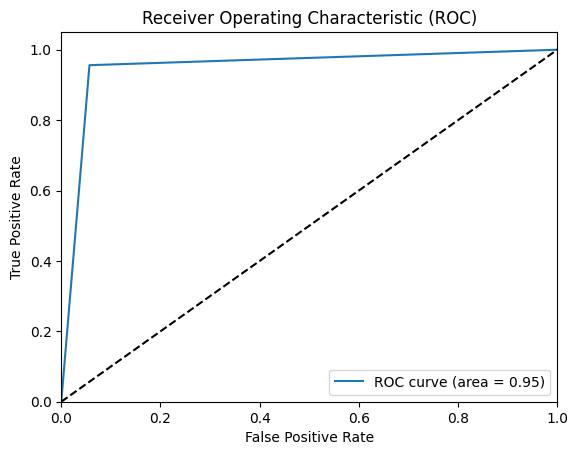

In [52]:
# Check the model's accuracy of test data and plot the ROC-AUC curve

from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = classifier_mnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)
print("ROC-AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Plot the confusion Matrix

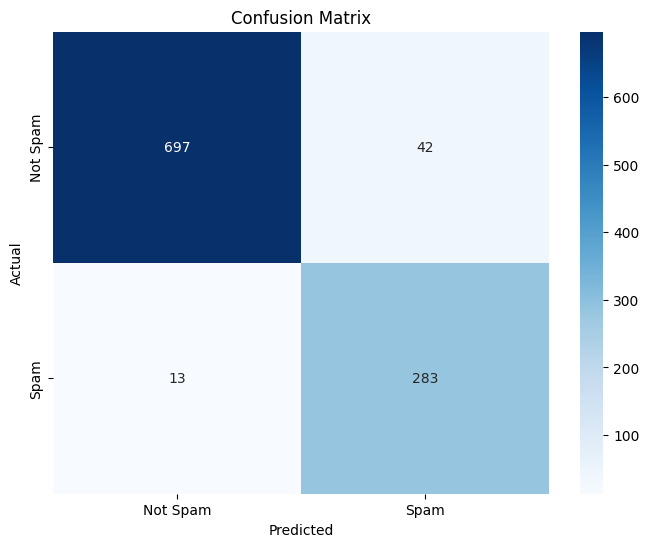

In [53]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
import seaborn as sns
from sklearn.metrics import confusion_matrix

selected_words = ['e', 't', 'a',	're', 's']
word_indices = [X_test.columns.get_loc(word) for word in selected_words]
X_test_selected = X_test.iloc[:, word_indices]
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Not Spam', 'Spam'])
plt.yticks([0.5, 1.5], ['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.show()

## Trying out with SVMs

Accuracy: 0.8009661835748793


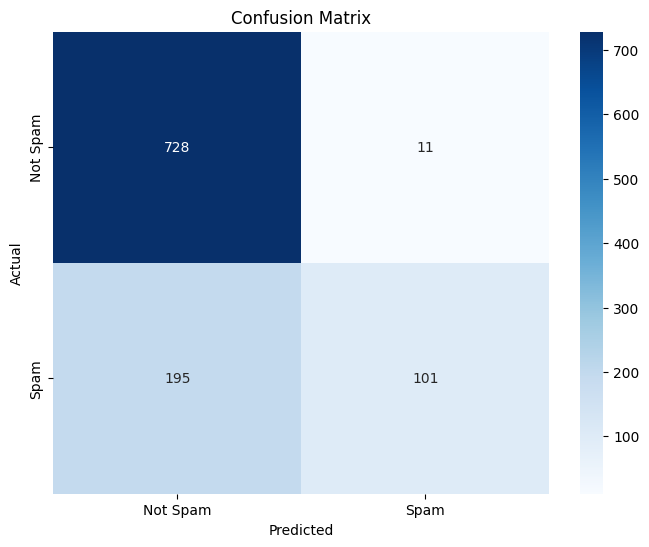

In [54]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

classifier_svc = SVC()
classifier_svc.fit(X_train, y_train)
y_pred = classifier_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Not Spam', 'Spam'])
plt.yticks([0.5, 1.5], ['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.show()


## Comparing the models

In [55]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?

from sklearn.metrics import accuracy_score

y_pred_mnb = classifier_mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print("Accuracy - Multinomial Naive Bayes:", accuracy_mnb)

y_pred_svc = classifier_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy - Support Vector Classifier:", accuracy_svc)


Accuracy - Multinomial Naive Bayes: 0.9468599033816425
Accuracy - Support Vector Classifier: 0.8009661835748793


## Bonus Question

In [56]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

from collections import Counter

s = "I am a Python developer and currently working on a project to classify mails"
words = s.split()

word_frequencies = Counter(words)
dataframe = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])

print(dataframe)

         Word  Frequency
0           I          1
1          am          1
2           a          2
3      Python          1
4   developer          1
5         and          1
6   currently          1
7     working          1
8          on          1
9     project          1
10         to          1
11   classify          1
12      mails          1
